# DMBI Project.

# Team Members Div-A.
    
## 1. Kashif Ansari (01)
## 2. Saurabh Bhosale (03)
## 3. Chinmay Gaikwad (12)

# Candidate Hiring Prediction using Decision Tree.

In this project, we build a Decision Tree Classifier to predict whether a candinate applying for a job at a company would get hired or not. we build two models, one with criterion gini index and another one with criterion entropy.We implement Decision Tree Classification with Python and Scikit-Learn. We have used the PastHires dataset for this project, downloaded from the UCI Machine Learning Repository website.

Dataset have 7 columns, Years Experience, Employed?	Previous employers,	Level of Education,	Top-tier school, Interned, and	Hired.

Model will predict whether the candidate would get hired by company based on the attributes of the candidate who gets hired or does not get hired from the past.


## Introduction to Decision Tree algorithm


A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 


A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node. 


## Data Preprocessing

In [11]:
import numpy as np
import pandas as pd
from sklearn import tree

 
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\ML\\DMBI\\MY_DT\\PastHires.csv")

df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


scikit-learn needs everything to be numerical for decision trees to work. So, we mapped Y,N to 1,0 and levels of education to some scale of 0-2.

In [12]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


## Next we  separate the features from the target column that we're trying to bulid a decision tree for.

In [13]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [14]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)   #fitting

## Constructing Decision Tree.

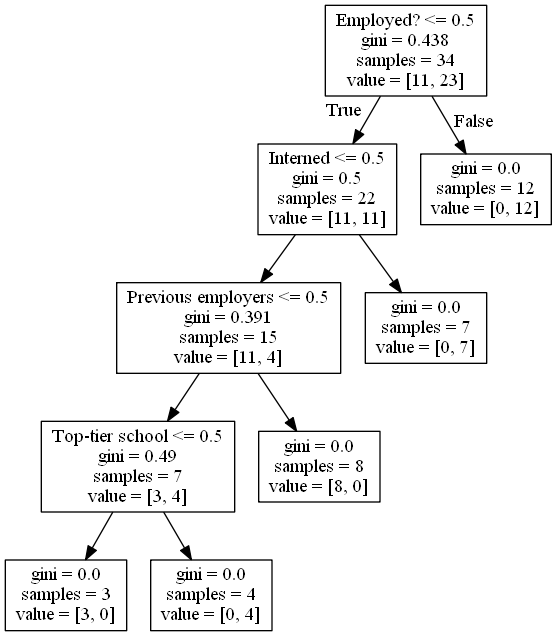

In [17]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Split data into separate training and test set

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)


In [22]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((27, 6), (7, 6))

In [23]:
# check data types in X_train

X_train.dtypes

Years Experience      int64
Employed?             int64
Previous employers    int64
Level of Education    int64
Top-tier school       int64
Interned              int64
dtype: object

## Encode categorical variables

In [24]:
# import category encoders

import category_encoders as ce

In [25]:
encoder = ce.OrdinalEncoder(cols=['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [26]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Predict the Test set results with criterion gini index

In [28]:
y_pred_gini = clf_gini.predict(X_test)

## Check accuracy score with criterion gini index.

In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7143


In [30]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9259


## Decision Tree Classifier with criterion entropy

In [31]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [34]:
y_pred_en = clf_en.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7143


In [36]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9259


# Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [37]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2 0]
 [2 3]]


# Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.60      0.75         5

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7



## Ensemble learning: using a random forest

## We use a random forest of 50 decision trees to predict employment of specific candidate profiles.

In [41]:
pList = [] 
maxLengthList = 6
while len(pList) < maxLengthList:
    exp = input("Number of year  Experience: ")
    pList.append(exp)
    emp = input("Employed?: ") #binary input 0 for No, 1 for Yes.
    pList.append(emp)
    pemp = input("Enter Number of Previous employers: ")
    pList.append(pemp)
    edu = input("Level of Education: ") # 0 for bachelors, 1 for Masters, 2 for PhDs 
    pList.append(edu)
    top = input(" From Top-tier school?: ") #binary input 0 for No, 1 for Yes. 
    pList.append(top)
    intern = input("Interned in this company?: ") #binary input 0 for No, 1 for Yes.
    pList.append(intern)
print(pList)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)


if (clf.predict([pList])) == 0:
    print("Candidate can not get Hired.")
else:
    print("Candidate can get Hired.")

Number of year  Experience: 12
Employed?: 0
Enter Number of Previous employers: 2
Level of Education: 1
 From Top-tier school?: 1
Interned in this company?: 1
['12', '0', '2', '1', '1', '1']
Candidate can get Hired.
